<a href="https://colab.research.google.com/github/YanfeiWang3973/web-scraping/blob/main/real_estate_data_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# just use a simple web witch doesn't turn everything into JS and just by using HTML and API to scrap data
# with others like ZOLO.com, https://www.realtor.ca/ needed to deal with JS and more advanced skills
# gd: by using playwright (which doesn't work https://toronto.craigslist.org/with colab, but can be used in local notebook)
# for this project we use https://toronto.craigslist.org/ (I love you thank god you exist )

In [ ]:
# import
import requests
from bs4 import BeautifulSoup

In [ ]:
# find the url and use impact network to find a user agnet
url = "https://toronto.craigslist.org/search/rea#search=2~gallery~0"
headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36'
            }
# use request to get the url (it's like when 'view page source' to review the enitire page source)
response = requests.get(url, headers=headers)
# then check if we got block by checking the status
response.status_code

200

In [ ]:
# since we got through, now use bs4 to read it and find the class names for useful data
soup = BeautifulSoup(response.text, 'html.parser')
# check soup
# print(soup.prettify()[:5000])

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="craigslist" property="og:site_name"/>
  <meta content="preview" name="twitter:card"/>
  <meta content="toronto real estate - craigslist" property="og:title"/>
  <meta content="toronto real estate - craigslist" name="description"/>
  <meta content="toronto real estate - craigslist" property="og:description"/>
  <meta content="https://toronto.craigslist.org/search/rea" property="og:url"/>
  <title>
   toronto real estate - craigslist
  </title>
  <link href="https://toronto.craigslist.org/search/rea" rel="canonical"/>
  <link href="https://toronto.craigslist.org/search/rea" hreflang="x-default" rel="alternate"/>
  <link href="/favicon.ico" id="favicon" rel="icon">
   <script id="ld_searchpage_data" type="application/ld+json">
    {"@type":"SearchResultsPage","@context":"https://schema.org"

In [ ]:
# then find all listings :
listings = soup.find_all("li", class_= "cl-static-search-result" )
# I want to check a few listings to see the class names of each data I want
print(listings[0])  # just the first one
# it's easier just to look at the webpage's 'view source' html code

<li class="cl-static-search-result" title="Amazing ravine lot  in Don Mills - 2 + 1 Bedroom semi for sale!">
<a href="https://toronto.craigslist.org/tor/reb/d/north-york-amazing-ravine-lot-in-don/7864673298.html">
<div class="title">Amazing ravine lot  in Don Mills - 2 + 1 Bedroom semi for sale!</div>
<div class="details">
<div class="price">$1,298,000</div>
<div class="location">
                        Don Mills
                    </div>
</div>
</a>
</li>


In [ ]:
# use a for loop to put data in an empty list (try... except... to avoid crushes)
house_data = []

for post in listings:
  try:
    title = post.find("div", class_="title").text.strip()
    price = int(post.find("div", class_="price").text.strip().replace('$', '').replace(',', ''))
    city = post.find("div", class_="location").text.strip()
    link = post.find("a")["href"]

    # add data into the empty list as a dict
    house_data.append(
        {
            "title":title,
            "price":price,
            "city":city,
            "link":link
        }
    )
  except:
    continue

In [ ]:
house_data

[{'title': 'Amazing ravine lot  in Don Mills - 2 + 1 Bedroom semi for sale!',
  'price': 1298000,
  'city': 'Don Mills',
  'link': 'https://toronto.craigslist.org/tor/reb/d/north-york-amazing-ravine-lot-in-don/7864673298.html'},
 {'title': 'Fantastic bungalow for sale in Don Mills',
  'price': 1628000,
  'city': 'Lawrence/Don Mills',
  'link': 'https://toronto.craigslist.org/tor/reb/d/north-york-fantastic-bungalow-for-sale/7864671413.html'},
 {'title': 'Bright & spacious downtown Toronto condo for sale',
  'price': 599900,
  'city': 'Niagara Toronto C01 Bathurst/Lakeshore',
  'link': 'https://toronto.craigslist.org/tor/reb/d/downtown-toronto-bright-spacious/7864671250.html'},
 {'title': 'Gorgeous Luxury Donalda Parkwoods Home on Ravine Lot',
  'price': 3298000,
  'city': 'Don Mills',
  'link': 'https://toronto.craigslist.org/tor/reb/d/north-york-gorgeous-luxury-donalda/7864671168.html'},
 {'title': 'Wonderful Don Mills semi overlooking Donalda Golf course & ravine',
  'price': 1398000,

In [ ]:
# use pandas turn this dict list into a dataframe
import pandas as pd

house_df = pd.DataFrame(house_data)

In [ ]:
# check the first few lines of the data frame
print(house_df.head(10))

                                               title    price  \
0  Amazing ravine lot  in Don Mills - 2 + 1 Bedro...  1298000   
1           Fantastic bungalow for sale in Don Mills  1628000   
2  Bright & spacious downtown Toronto condo for sale   599900   
3  Gorgeous Luxury Donalda Parkwoods Home on Ravi...  3298000   
4  Wonderful Don Mills semi overlooking Donalda G...  1398000   
5  Fantastic detached home in Don Mills! Perfect ...  1578800   
6           Modern move-in ready Don Mills townhouse   998800   
7     Trendy 2 bedrom condo in Toronto's Queen West!   849900   
8        Wonderful Toronto condo at Yonge & Sheppard   659900   
9              Wonderful Toronto condo move in ready     2350   

                                     city  \
0                               Don Mills   
1                      Lawrence/Don Mills   
2  Niagara Toronto C01 Bathurst/Lakeshore   
3                               Don Mills   
4                               Don Mills   
5             

In [ ]:
# the data isn't clean since we only want sales data and this df is mixed with lease data
# we need to clean it
# make a list of ket words we don't want
keywords = ['rent', 'lease', 'airbnb', 'night', 'stay', 'day']
# then filter these key words out
house_df = house_df[~house_df['title'].str.lower().str.contains('|'. join(keywords))]

In [ ]:
house_df.head(10)

,title,price,city,link
0,Uxbridge ON - 50 Acres Beside a Small Lake 20 ...,399000,Uxbridge ON,https://toronto.craigslist.org/drh/reo/d/uxbri...
3,"Uxbridge, ON - 15 Acres To Build Your Country ...",599000,city of toronto,https://toronto.craigslist.org/tor/reo/d/uxbri...
4,"Brock Area ON - 76A Near Uxbrdge, Trans Canada...",999000,"Brock Area, ON",https://toronto.craigslist.org/tor/reo/d/peter...
6,FOR SALE: 3-Bedroom Detached Home with Finishe...,1100000,Mississauga,https://toronto.craigslist.org/mss/reb/d/missi...
7,FOR SALE: 3 Bed/3 Bath Mattamy Netherby Model ...,810000,Milton,https://toronto.craigslist.org/oak/reb/d/halto...
8,3+1 Detached Home On Rural ½ Acre Property in ...,999000,Milton,https://toronto.craigslist.org/oak/reb/d/halto...
9,FOR SALE: 1 Bed Modern Condo Apartment/West Fa...,469000,Milton,https://toronto.craigslist.org/oak/reb/d/milto...
10,Rogers Centre 2 Br + Den 2 Wr - 31St Floor,3800,Waterfront,https://toronto.craigslist.org/tor/reb/d/roger...
11,Towns by Rouge Valley,758800,Scarborough,https://toronto.craigslist.org/tor/reb/d/scarb...
12,"Studio, Open concept 1 Bath University & Dunda...",2150,96 St Patrick Street,https://toronto.craigslist.org/tor/reb/d/studi...


In [ ]:
# after checking the df the leasings are still mixed in the data , we have to filter it with price, so anything under $10000 should be removed
house_df =house_df[ house_df['price'] >= 10000]

In [ ]:
house_df.head(10)

,title,price,city,link
0,Uxbridge ON - 50 Acres Beside a Small Lake 20 ...,399000,Uxbridge ON,https://toronto.craigslist.org/drh/reo/d/uxbri...
3,"Uxbridge, ON - 15 Acres To Build Your Country ...",599000,city of toronto,https://toronto.craigslist.org/tor/reo/d/uxbri...
4,"Brock Area ON - 76A Near Uxbrdge, Trans Canada...",999000,"Brock Area, ON",https://toronto.craigslist.org/tor/reo/d/peter...
6,FOR SALE: 3-Bedroom Detached Home with Finishe...,1100000,Mississauga,https://toronto.craigslist.org/mss/reb/d/missi...
7,FOR SALE: 3 Bed/3 Bath Mattamy Netherby Model ...,810000,Milton,https://toronto.craigslist.org/oak/reb/d/halto...
8,3+1 Detached Home On Rural ½ Acre Property in ...,999000,Milton,https://toronto.craigslist.org/oak/reb/d/halto...
9,FOR SALE: 1 Bed Modern Condo Apartment/West Fa...,469000,Milton,https://toronto.craigslist.org/oak/reb/d/milto...
11,Towns by Rouge Valley,758800,Scarborough,https://toronto.craigslist.org/tor/reb/d/scarb...
14,"Condo Warden & Sheppard 1 bed +Den, Pinnacle East",525000,scarborough,https://toronto.craigslist.org/tor/reo/d/scarb...
17,15 MADONNA GARDENS - RENOVATED TORONTO HOME W1...,979000,Toronto,https://toronto.craigslist.org/tor/reb/d/north...


<Axes: ylabel='Frequency'>

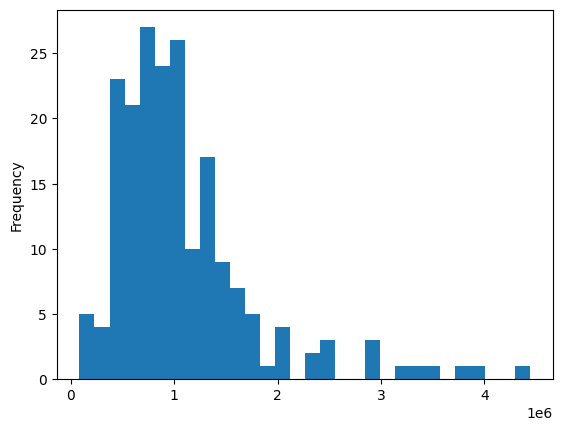

In [ ]:
house_df.describe()
house_df['city'].value_counts()
house_df['price'].plot.hist(bins=30)


In [ ]:
# need a phase 2 data scraping cos the housing info doesn't contain any room info
# the index would be url

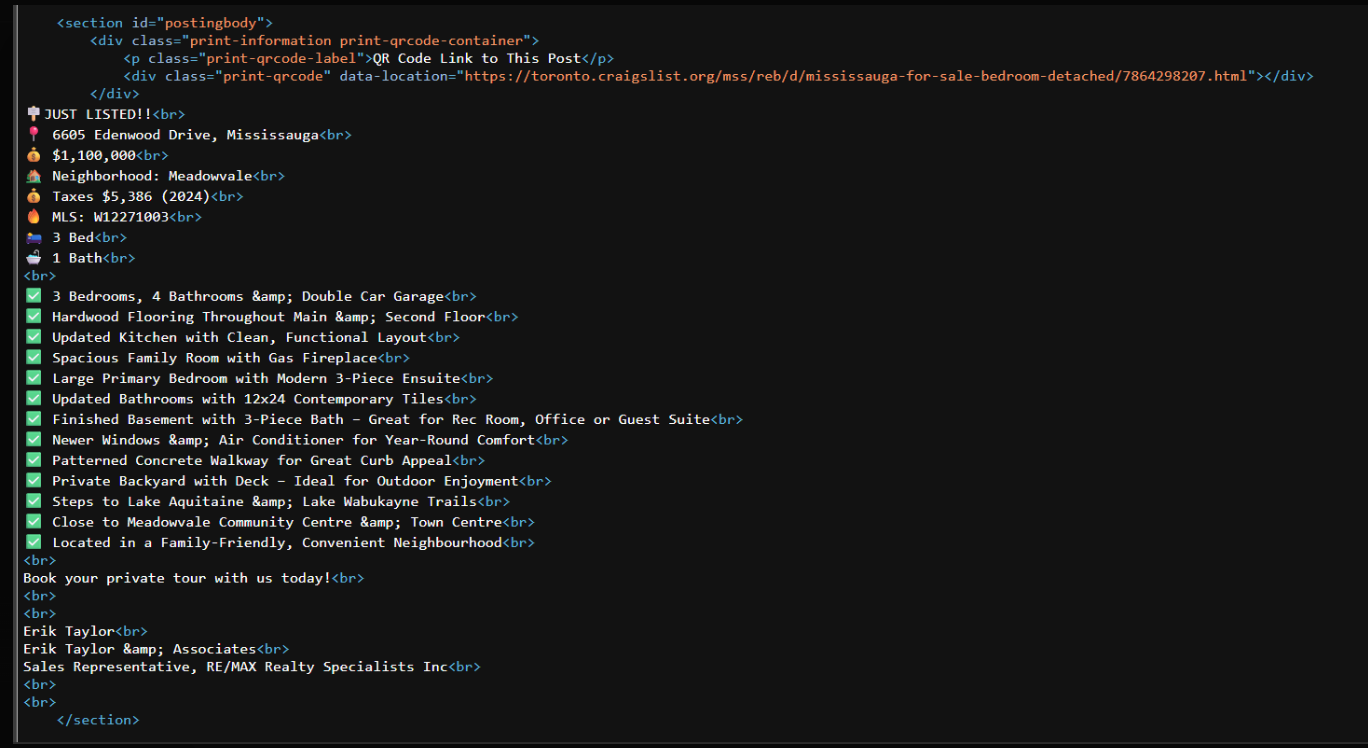

In [ ]:
# html was clean the first day I tried data scraping

detail_data = []

for url in house_df['link']:
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        section = soup.find("section", id="postingbody")
        text = section.get_text(separator="\n").lower()

        # crude parsing — later we can regex this
        beds = None
        baths = None
        taxes = None

        for line in text.split("\n"):
            if 'bed' in line and beds is None:
                beds = ''.join(filter(str.isdigit, line))
            if 'bath' in line and baths is None:
                baths = ''.join(filter(str.isdigit, line))
            if 'taxes' in line and taxes is None:
                taxes = ''.join(filter(str.isdigit, line))

        detail_data.append({
            'link': url,
            'beds': beds,
            'baths': baths,
            'taxes': taxes
        })

    except Exception as e:
        print(f"Failed on {url}: {e}")
        continue


the next day the htmml code has changed into this

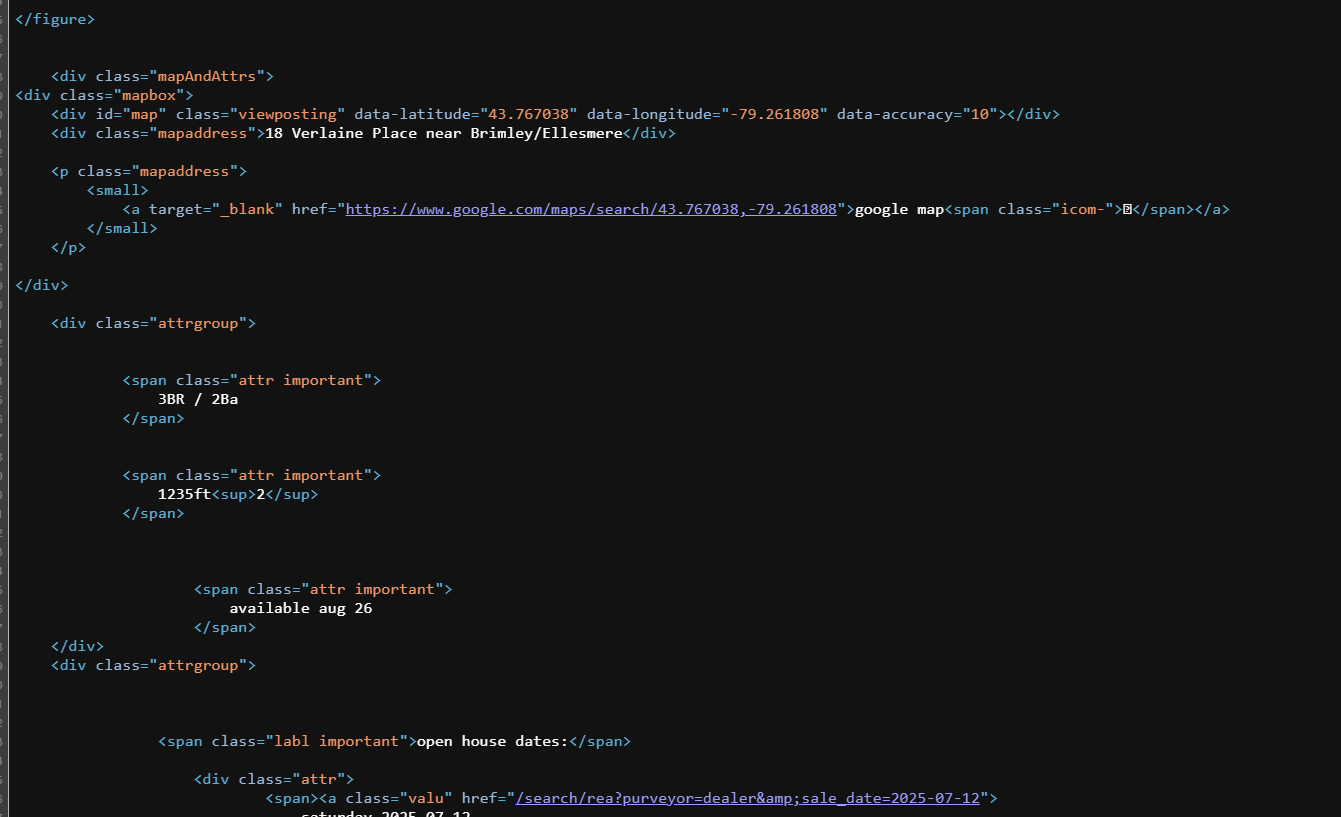

In [ ]:
for url in house_df['link']:
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        beds = None
        baths = None
        sqft = None
        address = None

        attr_spans = soup.find_all("span", class_="attr important")

        for span in attr_spans:
            text = span.get_text().strip().lower()

            if 'br' in text and 'ba' in text:
                br_match = re.search(r'(\d+)\s*br', text)
                ba_match = re.search(r'(\d+)\s*ba', text)
                if br_match:
                    beds = br_match.group(1)
                if ba_match:
                    baths = ba_match.group(1)

            elif 'ft' in text:
                sqft_match = re.search(r'(\d+)\s*ft', text)
                if sqft_match:
                    sqft = sqft_match.group(1)

        # ✅ Get the street address
        address_tag = soup.find("h2", class_="street-address")
        if address_tag:
            address = address_tag.get_text(strip=True)

        detail_data.append({
            'link': url,
            'beds': beds,
            'baths': baths,
            'sqft': sqft,
            'address': address  # ← renamed from 'available'
        })

    except Exception as e:
        print(f"Failed on {url}: {e}")
        continue


In [ ]:
detail_df = pd.DataFrame(detail_data)


In [ ]:
full_df = house_df.merge(detail_df, on='link', how='left')

In [ ]:
detail_df

,link,beds,baths,taxes
0,https://toronto.craigslist.org/tor/reb/d/north...,None,4401,None
1,https://toronto.craigslist.org/tor/reb/d/north...,32,32,None
2,https://toronto.craigslist.org/tor/reb/d/downt...,11,11,None
3,https://toronto.craigslist.org/tor/reb/d/north...,55,300312255373,None
4,https://toronto.craigslist.org/tor/reb/d/north...,414012021242425,43,None
...,...,...,...,...
192,https://toronto.craigslist.org/drh/reb/d/north...,34,34,None
193,https://toronto.craigslist.org/drh/reb/d/oshaw...,4323432,4323432,None
194,https://toronto.craigslist.org/yrk/reb/d/maple...,4,25,None
195,https://toronto.craigslist.org/mss/reb/d/etobi...,21,2,None


In [ ]:
full_df

,title,price,city,link,beds,baths,sqft,available,address
0,Amazing ravine lot in Don Mills - 2 + 1 Bedro...,1298000,Don Mills,https://toronto.craigslist.org/tor/reb/d/north...,None,None,1470,jul 29,NaN
1,Amazing ravine lot in Don Mills - 2 + 1 Bedro...,1298000,Don Mills,https://toronto.craigslist.org/tor/reb/d/north...,None,None,1470,NaN,"141 Three Valleys Drive, Toronto, ON M3A3C1"
2,Fantastic bungalow for sale in Don Mills,1628000,Lawrence/Don Mills,https://toronto.craigslist.org/tor/reb/d/north...,3,2,1365,None,NaN
3,Fantastic bungalow for sale in Don Mills,1628000,Lawrence/Don Mills,https://toronto.craigslist.org/tor/reb/d/north...,3,2,1365,NaN,"24 Deepwood Crescent, Toronto, ON M3C1N8"
4,Bright & spacious downtown Toronto condo for sale,599900,Niagara Toronto C01 Bathurst/Lakeshore,https://toronto.craigslist.org/tor/reb/d/downt...,1,1,695,None,NaN
...,...,...,...,...,...,...,...,...,...
389,Executive 4 Bed / 2.5 Bath Detached Home,1786000,Vaughan,https://toronto.craigslist.org/yrk/reb/d/maple...,4,5,2577,NaN,"58 Asner Ave, Vaughan, ON L6A0W6"
390,Charming 3+1 Bed / 2 Bath Detached Home - $985...,985000,Mimico | Mississauga,https://toronto.craigslist.org/mss/reb/d/etobi...,2,2,1732,None,NaN
391,Charming 3+1 Bed / 2 Bath Detached Home - $985...,985000,Mimico | Mississauga,https://toronto.craigslist.org/mss/reb/d/etobi...,2,2,1732,NaN,"147 Royal York Rd, Toronto, ON M8V2T9"
392,OFF MARKET!!! $200K+ Spread! Detached Bungalow...,599900,city of toronto,https://toronto.craigslist.org/tor/reo/d/oshaw...,None,None,1125,None,NaN
